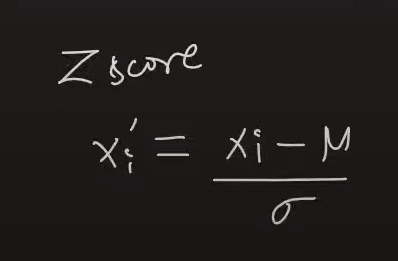

#### Here we use two methods
1) Trimming
2) Capping

In [61]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('placement.csv')

In [33]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
import seaborn as sns

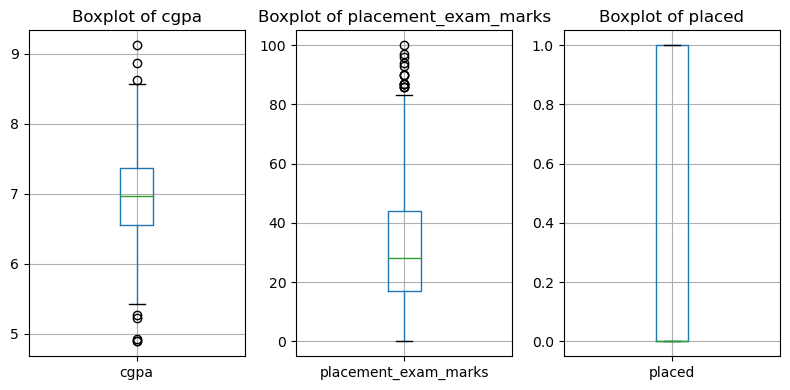

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(8,4))

# Plot boxplots for each column
for i, column in enumerate(df.columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()

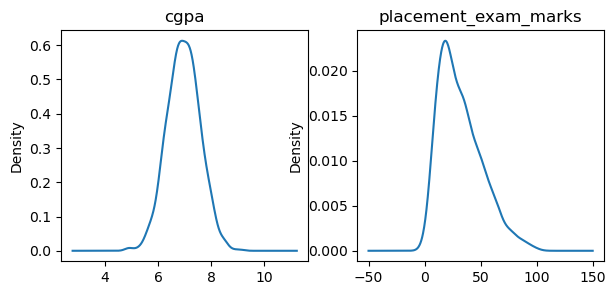

In [38]:
fig,axes = plt.subplots(1,2,figsize=(7,3))

for i, columns in enumerate(df.iloc[:,:2].columns):
    
    df[columns].plot.density(ax=axes[i])
    axes[i].set_title(f'{columns}')

#### Now finding out outliers in particular columns and then dealing with it

In [39]:
# first find out mean, std., min. and max.

print('mean of cgpa columns is: ',df['cgpa'].mean())
print('std of cgpa columns is: ',df['cgpa'].std())
print('min of cgpa columns is: ',df['cgpa'].min())
print('max of cgpa columns is: ',df['cgpa'].max())

mean of cgpa columns is:  6.96124
std of cgpa columns is:  0.6158978751323894
min of cgpa columns is:  4.89
max of cgpa columns is:  9.12


In [40]:
df.drop(columns=['placed']).describe()

,cgpa,placement_exam_marks
count,1000.000000,1000.000000
mean,6.961240,32.225000
std,0.615898,19.130822
min,4.890000,0.000000
25%,6.550000,17.000000
50%,6.960000,28.000000
75%,7.370000,44.000000
max,9.120000,100.000000


## highest and lowest allowed values will be μ+3σ and μ-3σ

In [41]:
print("highest allowed value in cgpa column is:", df.cgpa.mean() + 3*df.cgpa.std())
print("lowest allowed value in cgpa column is:", df.cgpa.mean() - 3*df.cgpa.std())

highest allowed value in cgpa column is: 8.808933625397168
lowest allowed value in cgpa column is: 5.113546374602832


#### now finding out values which are above or below of this value

In [42]:
df[(df.cgpa< df.cgpa.mean() + 3*df.cgpa.std()) & (df.cgpa> df.cgpa.mean() - 3*df.cgpa.std())]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [43]:
# this will give all the values which are outside

In [44]:
df[(df.cgpa> df.cgpa.mean() + 3*df.cgpa.std()) | (df.cgpa< df.cgpa.mean() - 3*df.cgpa.std())]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# 1 Trimming

#### there are two things in trimming
1) either we can remove all the values which are outside of min and max value
2) or we can find Z-score and remove all the values outside of -3 and 3

#### making a new dataframe which has values only in the accepted range

In [45]:
new_df = df[(df.cgpa< df.cgpa.mean() + 3*df.cgpa.std()) & (df.cgpa> df.cgpa.mean() - 3*df.cgpa.std())]

In [46]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


#### Now calculating Z-score for each values in cgpa column

In [47]:
df['cgpa_zscore'] = (df.cgpa - df.cgpa.mean())/df.cgpa.std()

In [48]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [49]:
df[df.cgpa_zscore > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [50]:
df[df.cgpa_zscore < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [51]:
df[(df.cgpa_zscore > 3) | (df.cgpa_zscore < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [52]:
## this is the new dataframe which has values in between 3 and -3 

In [53]:
new_df2 = df[(df.cgpa_zscore < 3) & (df.cgpa_zscore > -3)]

In [54]:
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# 2 Capping

#### here we replace all the values which are outside of max. and min. limit with max. and min. limit respectively

In [55]:
upper_limit = df.cgpa.mean() + 3*df.cgpa.std()
lower_limit = df.cgpa.mean() - 3*df.cgpa.std()

In [56]:
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [57]:
new_df3 = df.copy()

In [58]:
new_df3.cgpa = np.where(new_df3.cgpa > upper_limit,
                       upper_limit,
                       np.where(
                       new_df3.cgpa < lower_limit,
                           lower_limit,
                           df.cgpa
                       ))

In [59]:
new_df3[(new_df3.cgpa < upper_limit) | (new_df3.cgpa > lower_limit)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [60]:
# above line of code is not reasonable to run it
new_df3.describe()

,cgpa,placement_exam_marks,placed,cgpa_zscore
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


In [ ]:
np.where()